# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [3]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')
print(df.columns)
df.head()

Index(['piece_count', 'list_price', 'num_reviews', 'play_star_rating',
       'star_rating', 'val_star_rating', 'ages_10+', 'ages_10-14',
       'ages_10-16', 'ages_10-21',
       ...
       'country_NZ', 'country_PL', 'country_PT', 'country_US',
       'review_difficulty_Average', 'review_difficulty_Challenging',
       'review_difficulty_Easy', 'review_difficulty_Very Challenging',
       'review_difficulty_Very Easy', 'review_difficulty_unknown'],
      dtype='object', length=103)


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [4]:
# Your code here - Manipulate column names
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]

def col_format(col):
    for old, new in subs:
        col = col.replace(old, new)
    return col

df.columns = [col_format(col) for col in df.columns]

In [6]:
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [10]:
# Your code here - Define the target and predictors
target = 'list_price'
x_cols = list(df.columns)
x_cols.remove(target)

In [11]:
# Your code here - Split into train and test
train, test = train_test_split(df)

In [13]:
# Your code here - Fit the actual model
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     579.0
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:03:50   Log-Likelihood:                -40527.
No. Observations:                8152   AIC:                         8.124e+04
Df Residuals:                    8057   BIC:                         8.191e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.5278      1.717     38.172      0.000      62.163      68.893
piece_count                                         73.3333      0.902     81.308      0.000      71.565      75.101
num_reviews                                          6.8051      0.694      9.806      0.000       5.445       8.165
play_star_rating                                     5.0010      0.623      8.023      0.000       3.779       6.223
star_rating                                         -1.8279      0.706     -2.590      0.010      -3.211      -0.444
val_star_rating                                     -8.5136      0.628    -13.563      0.000      -9.744      -7.283
ages_10plus                                        120.1802      6.695     17.951      0.000     107.056     133.304
ages_10_14                                         -27.1713      9.802     -2.772      0.006     -46.386      -7.957
ages_10_16                                         -10.8287      4.015     -2.697      0.007     -18.700      -2.958
ages_10_21                                          64.0045      7.328      8.735      0.000      49.640      78.369
ages_11_16                                         -10.0582      5.843     -1.721      0.085     -21.513       1.396
ages_12plus                                         73.2886      5.611     13.062      0.000      62.290      84.288
ages_12_16                                         -60.3498      6.635     -9.095      0.000     -73.357     -47.343
ages_14plus                                         25.9231      4.307      6.019      0.000      17.481      34.366
ages_16plus                                         48.8168      6.185      7.893      0.000      36.693      60.940
ages_1half_3                                        -9.6294      2.397     -4.016      0.000     -14.329      -4.930
ages_1half_5                                        -4.1224      3.068     -1.344      0.179     -10.137       1.892
ages_2_5                                            13.9035      1.676      8.295      0.000      10.618      17.189
ages_4plus                                         -19.9807      6.320     -3.162      0.002     -32.369      -7.592
ages_4_7                                            -6.6502      3.192     -2.083      0.037     -12.907      -0.393
ages_4_99                                           -2.7998      3.608     -0.776      0.438      -9.872       4.273
ages_5plus                                         -10.9072      3.217     -3.391      0.001     -17.213      -4.602
ages_5_12                                          -38.5138      3.137    -12.276      0.000     -44.664     -32.364
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [14]:
# Your code here - Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 73
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,65.5278,1.717,38.172,0.00,62.163,68.893
piece_count,73.3333,0.902,81.308,0.00,71.565,75.101
num_reviews,6.8051,0.694,9.806,0.00,5.445,8.165
play_star_rating,5.0010,0.623,8.023,0.00,3.779,6.223
star_rating,-1.8279,0.706,-2.590,0.01,-3.211,-0.444


In [15]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     755.8
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:07:22   Log-Likelihood:                -40537.
No. Observations:                8152   AIC:                         8.122e+04
Df Residuals:                    8079   BIC:                         8.173e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.1653      2.166     29.618      0.000      59.918      68.412
piece_count                                         73.1054      0.837     87.338      0.000      71.465      74.746
num_reviews                                          6.8271      0.686      9.952      0.000       5.482       8.172
play_star_rating                                     5.2195      0.608      8.588      0.000       4.028       6.411
star_rating                                         -1.7877      0.690     -2.591      0.010      -3.140      -0.435
val_star_rating                                     -8.5294      0.598    -14.265      0.000      -9.702      -7.357
ages_10plus                                        128.2796      7.567     16.952      0.000     113.446     143.114
ages_10_14                                         -20.8521     10.260     -2.032      0.042     -40.965      -0.739
ages_10_16                                          -6.7556      4.023     -1.679      0.093     -14.642       1.130
ages_10_21                                          72.0209      8.034      8.965      0.000      56.272      87.770
ages_12plus                                         80.4864      6.479     12.423      0.000      67.787      93.186
ages_12_16                                         -55.0832      6.902     -7.981      0.000     -68.612     -41.554
ages_14plus                                         32.8951      4.876      6.746      0.000      23.336      42.454
ages_16plus                                         55.6692      6.600      8.435      0.000      42.732      68.607
ages_1half_3                                        -3.8856      3.477     -1.117      0.264     -10.701       2.930
ages_2_5                                            19.2500      2.534      7.598      0.000      14.283      24.217
ages_4plus                                         -18.5045      9.679     -1.912      0.056     -37.478       0.469
ages_4_7                                            -2.4318      2.688     -0.905      0.366      -7.701       2.837
ages_5plus                                          -9.0640      3.275     -2.767      0.006     -15.485      -2.643
ages_5_12                                          -32.0671      3.105    -10.326      0.000     -38.154     -25.980
ages_6plus                                         -23.5988      5.660     -4.170      0.000     -34.693     -12.504
ages_6_12                                          -18.0989      2.394     -7.559      0.000     -22.792     -13.406
ages_7_12                                          -16.5057      2.668     -6.187      0.000     -21.735     -11.276
ages_7_14                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [16]:
# Your code here - Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

74 64
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,64.1653,2.166,29.618,0.00,59.918,68.412
piece_count,73.1054,0.837,87.338,0.00,71.465,74.746
num_reviews,6.8271,0.686,9.952,0.00,5.482,8.172
play_star_rating,5.2195,0.608,8.588,0.00,4.028,6.411
star_rating,-1.7877,0.690,-2.591,0.01,-3.140,-0.435


In [17]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     863.0
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:08:41   Log-Likelihood:                -40544.
No. Observations:                8152   AIC:                         8.122e+04
Df Residuals:                    8088   BIC:                         8.166e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           62.5888      1.210     51.732      0.000      60.217      64.961
piece_count                                         73.0041      0.810     90.080      0.000      71.415      74.593
num_reviews                                          6.3879      0.643      9.931      0.000       5.127       7.649
play_star_rating                                     5.4088      0.603      8.975      0.000       4.227       6.590
star_rating                                         -1.8777      0.684     -2.743      0.006      -3.219      -0.536
val_star_rating                                     -8.6299      0.591    -14.592      0.000      -9.789      -7.471
ages_10plus                                        130.1206      7.423     17.528      0.000     115.569     144.672
ages_10_14                                         -16.9303     10.033     -1.687      0.092     -36.598       2.737
ages_10_21                                          73.4192      7.939      9.247      0.000      57.856      88.982
ages_12plus                                         83.7500      6.245     13.411      0.000      71.508      95.992
ages_12_16                                         -50.8514      6.593     -7.713      0.000     -63.775     -37.928
ages_14plus                                         37.6230      4.405      8.540      0.000      28.987      46.259
ages_16plus                                         60.8614      6.128      9.932      0.000      48.849      72.874
ages_2_5                                            21.9045      1.796     12.193      0.000      18.383      25.426
ages_5plus                                          -7.6731      3.158     -2.429      0.015     -13.864      -1.482
ages_5_12                                          -29.5231      2.561    -11.526      0.000     -34.544     -24.502
ages_6plus                                         -20.8964      5.377     -3.886      0.000     -31.437     -10.356
ages_6_12                                          -15.2538      1.582     -9.642      0.000     -18.355     -12.153
ages_7_12                                          -13.5662      1.956     -6.935      0.000     -17.401      -9.732
ages_7_14                                          -10.2494      1.707     -6.004      0.000     -13.596      -6.903
ages_8plus                                          20.9383      4.898      4.275      0.000      11.337      30.540
ages_8_12                                          -12.3912      2.560     -4.840      0.000     -17.410      -7.373
ages_8_14                                           -8.0687      1.672     -4.825      0.000     -11.347      -4.790
ages_9plus                               

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [18]:
# Your code here - Code a way to identify multicollinearity
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

C:\Users\Devin\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.128221325156555),
 ('num_reviews', 2.605118386970211),
 ('play_star_rating', 2.4253147120810916),
 ('star_rating', 3.1691399180333),
 ('val_star_rating', 2.398063809164698),
 ('ages_10plus', 17.61355710045184),
 ('ages_10_14', 1.0731588816036142),
 ('ages_10_21', 7.166386122583978),
 ('ages_12plus', 6.873935146059578),
 ('ages_12_16', 1.1482850232132857),
 ('ages_14plus', 1.9572180572176998),
 ('ages_16plus', 8.404455083214842),
 ('ages_2_5', 1.195154720139849),
 ('ages_5plus', inf),
 ('ages_5_12', 3.217804089049597),
 ('ages_6plus', 2.663759373304415),
 ('ages_6_12', 1.7882279382823723),
 ('ages_7_12', 1.4184706152144833),
 ('ages_7_14', 1.8210818035849536),
 ('ages_8plus', 3.330894490860008),
 ('ages_8_12', 1.2160184573645747),
 ('ages_8_14', 1.6074739629547672),
 ('ages_9plus', 1.5481578505962093),
 ('ages_9_12', 1.0174102286543942),
 ('theme_name_Architecture', 5.853086934645461),
 ('theme_name_BOOST', 1.0648245408983514),
 ('theme_name_Blues_Helicopter_Pursuit',

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [19]:
# Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

64 55


In [21]:
# Your code here - Refit model with subset features
predictors = '+'.join(x_cols)
formula = target + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     876.9
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:10:05   Log-Likelihood:                -40969.
No. Observations:                8152   AIC:                         8.205e+04
Df Residuals:                    8096   BIC:                         8.244e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           68.4458      1.081     63.302      0.000      66.326      70.565
piece_count                                         76.4732      0.671    113.912      0.000      75.157      77.789
num_reviews                                          5.9990      0.630      9.527      0.000       4.765       7.233
play_star_rating                                     7.2569      0.548     13.252      0.000       6.183       8.330
star_rating                                         -2.6865      0.695     -3.865      0.000      -4.049      -1.324
val_star_rating                                     -9.7578      0.613    -15.918      0.000     -10.959      -8.556
ages_10_14                                         -27.7785     10.548     -2.633      0.008     -48.456      -7.101
ages_12_16                                         -68.1542      6.664    -10.227      0.000     -81.218     -55.091
ages_14plus                                         10.9411      4.093      2.673      0.008       2.919      18.964
ages_2_5                                            18.0005      1.770     10.172      0.000      14.532      21.469
ages_5_12                                          -34.6354      2.638    -13.132      0.000     -39.806     -29.465
ages_6plus                                         -26.6803      5.627     -4.742      0.000     -37.710     -15.651
ages_6_12                                          -20.9844      1.581    -13.272      0.000     -24.084     -17.885
ages_7_12                                          -18.5798      1.995     -9.311      0.000     -22.491     -14.668
ages_7_14                                          -15.4481      1.728     -8.938      0.000     -18.836     -12.060
ages_8plus                                          -1.9277      4.339     -0.444      0.657     -10.433       6.577
ages_8_12                                          -17.2739      2.614     -6.608      0.000     -22.399     -12.149
ages_8_14                                          -13.5154      1.709     -7.906      0.000     -16.866     -10.164
ages_9plus                                          17.6212     10.666      1.652      0.099      -3.286      38.529
ages_9_12                                          -27.9608      6.263     -4.465      0.000     -40.237     -15.685
theme_name_BOOST                                    83.5270     10.177      8.208      0.000      63.578     103.476
theme_name_Blues_Helicopter_Pursuit                 24.4704      9.730      2.515      0.012       5.398      43.543
theme_name_Carnotaurus_Gyrosphere_Escape            49.5337     10.086      4.911      0.000      29.763      69.304
theme_name_City                          

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

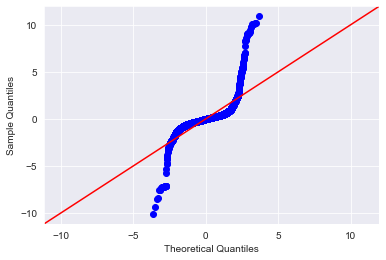

In [22]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

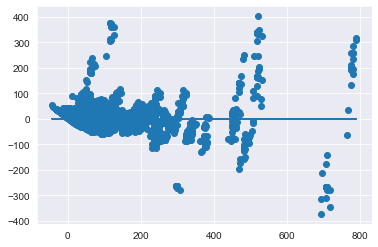

In [23]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [24]:
# Your code here - Check for outliers
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [25]:
# Your code here
# Remove extreme outliers

orig_tot = len(df)
df = df[df.list_price < 450] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Rerun the model
predictors = '+'.join(x_cols)
formula = target + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.010487580496780129


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     413.2
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:16:47   Log-Likelihood:                -5158.6
No. Observations:                8067   AIC:                         1.043e+04
Df Residuals:                    8011   BIC:                         1.082e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4793      0.014    255.678      0.000       3.453       3.506
piece_count                                          0.6265      0.010     63.571      0.000       0.607       0.646
num_reviews                                         -0.0143      0.008     -1.770      0.077      -0.030       0.002
play_star_rating                                     0.1272      0.007     18.217      0.000       0.114       0.141
star_rating                                         -0.0530      0.009     -6.037      0.000      -0.070      -0.036
val_star_rating                                     -0.1320      0.008    -16.937      0.000      -0.147      -0.117
ages_10_14                                           0.0851      0.127      0.672      0.502      -0.163       0.334
ages_12_16                                          -0.2294      0.089     -2.580      0.010      -0.404      -0.055
ages_14plus                                          0.1717      0.053      3.267      0.001       0.069       0.275
ages_2_5                                             0.4124      0.022     18.592      0.000       0.369       0.456
ages_5_12                                           -0.7959      0.033    -23.991      0.000      -0.861      -0.731
ages_6plus                                          -0.9710      0.072    -13.500      0.000      -1.112      -0.830
ages_6_12                                           -0.2789      0.020    -14.047      0.000      -0.318      -0.240
ages_7_12                                           -0.0229      0.025     -0.918      0.359      -0.072       0.026
ages_7_14                                           -0.1373      0.021     -6.411      0.000      -0.179      -0.095
ages_8plus                                           0.4741      0.054      8.858      0.000       0.369       0.579
ages_8_12                                            0.1443      0.032      4.508      0.000       0.082       0.207
ages_8_14                                            0.1523      0.021      7.156      0.000       0.111       0.194
ages_9plus                                           0.1214      0.123      0.989      0.323      -0.119       0.362
ages_9_12                                            0.2945      0.083      3.565      0.000       0.133       0.456
theme_name_BOOST                                     0.9598      0.136      7.038      0.000       0.692       1.227
theme_name_Blues_Helicopter_Pursuit                  0.7437      0.114      6.520      0.000       0.520       0.967
theme_name_Carnotaurus_Gyrosphere_Escape             1.1462      0.111     10.286      0.000       0.928       1.365
theme_name_City                          

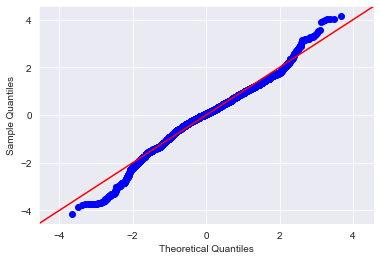

In [26]:
# Your code here - Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

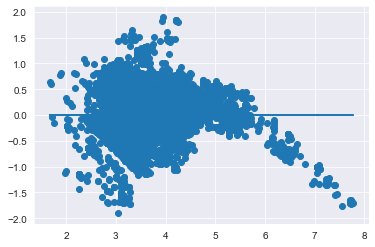

In [27]:
# Your code here - Check the Homoscedasticity Assumption
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 4.447203233446613
0.81 percentile: 4.512971560274537
0.82 percentile: 4.542526402035123
0.83 percentile: 4.580752485605895
0.84 percentile: 4.640913706863106
0.85 percentile: 4.6985494117910225
0.86 percentile: 4.718373863481943
0.87 percentile: 4.787408405976297
0.88 percentile: 4.8039210397329235
0.89 percentile: 4.826327766567244
0.9 percentile: 4.89924031131419
0.91 percentile: 4.976713742220571
0.92 percentile: 5.0490223265009595
0.93 percentile: 5.140421850231899
0.94 percentile: 5.209419483952433
0.95 percentile: 5.292263579298989
0.96 percentile: 5.391752152536553
0.97 percentile: 5.528952783620542
0.98 percentile: 5.678340376637527
0.99 percentile: 5.873347331375852


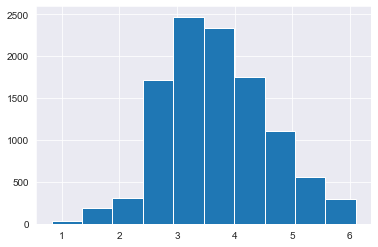

In [28]:
# Your code goes here
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

df.list_price.hist()

In [30]:
df = df[df.list_price <= 6]
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     415.1
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:19:26   Log-Likelihood:                -5024.0
No. Observations:                8027   AIC:                         1.016e+04
Df Residuals:                    7971   BIC:                         1.055e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4973      0.014    256.095      0.000       3.471       3.524
piece_count                                          0.6805      0.011     62.927      0.000       0.659       0.702
num_reviews                                         -0.0122      0.008     -1.528      0.127      -0.028       0.003
play_star_rating                                     0.1346      0.007     19.747      0.000       0.121       0.148
star_rating                                         -0.0601      0.009     -6.916      0.000      -0.077      -0.043
val_star_rating                                     -0.1264      0.008    -16.273      0.000      -0.142      -0.111
ages_10_14                                           0.1288      0.111      1.157      0.247      -0.089       0.347
ages_12_16                                          -0.4068      0.088     -4.643      0.000      -0.579      -0.235
ages_14plus                                          0.0911      0.052      1.737      0.082      -0.012       0.194
ages_2_5                                             0.4274      0.022     19.239      0.000       0.384       0.471
ages_5_12                                           -0.8524      0.033    -26.121      0.000      -0.916      -0.788
ages_6plus                                          -1.0728      0.074    -14.543      0.000      -1.217      -0.928
ages_6_12                                           -0.3011      0.019    -15.500      0.000      -0.339      -0.263
ages_7_12                                           -0.0113      0.025     -0.460      0.646      -0.059       0.037
ages_7_14                                           -0.1320      0.021     -6.188      0.000      -0.174      -0.090
ages_8plus                                           0.4745      0.056      8.490      0.000       0.365       0.584
ages_8_12                                            0.1503      0.031      4.781      0.000       0.089       0.212
ages_8_14                                            0.1746      0.021      8.269      0.000       0.133       0.216
ages_9plus                                           0.1316      0.126      1.045      0.296      -0.115       0.379
ages_9_12                                            0.2689      0.074      3.626      0.000       0.124       0.414
theme_name_BOOST                                     0.9326      0.135      6.929      0.000       0.669       1.196
theme_name_Blues_Helicopter_Pursuit                  0.7147      0.107      6.700      0.000       0.506       0.924
theme_name_Carnotaurus_Gyrosphere_Escape             1.1145      0.124      8.994      0.000       0.872       1.357
theme_name_City                          

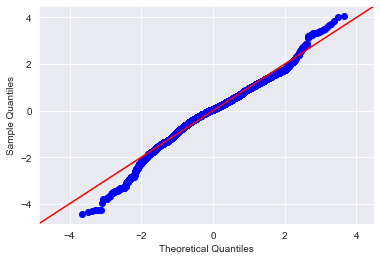

In [31]:
# Check the Normality Assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

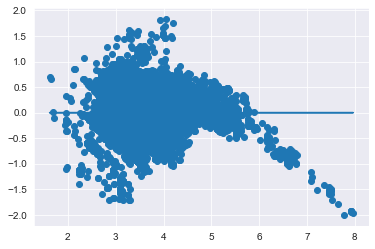

In [32]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [34]:
#no improvement noticed. new approach: build model from scratch
x_cols = ['piece_count', 'country_US']

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = target + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     4386.
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:20:31   Log-Likelihood:                -7484.3
No. Observations:                8027   AIC:                         1.497e+04
Df Residuals:                    8024   BIC:                         1.500e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7406      0.007    525.026      0.000       3.727       3.755
piece_count     0.7906      0.009     92.989      0.000       0.774       0.807
country_US     -0.2836      0.027    -10.314      0.000      -0.337      -0.230
==============================================================================
Omnibus:                      503.036   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              753.937
Skew:                          -0.529   Prob(JB):                    1.93e-164
Kurtosis:                       4.065   Cond. No.                         4.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

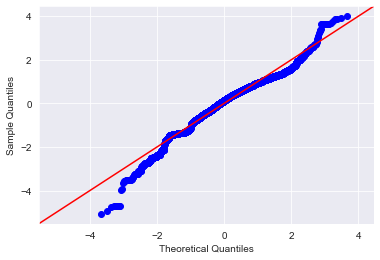

In [35]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

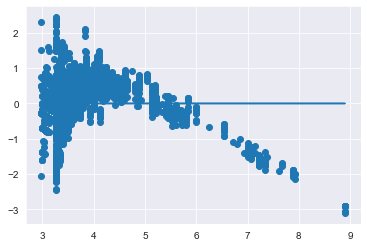

In [36]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [ ]:
# Note: over half of model's prediction comes from just two columns

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 